<a href="https://colab.research.google.com/github/4elvis/Descriptive-Statistics-Project/blob/main/Titanic_Disaster_Prediction%2C_Week_9_%2C_Elvis_N%2C_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE TITANIC SURVIVAL DISATER PREDICTION: USING KNN CLASSIFIER**

# **INTRODUCTION**


# 1,1 **Defining the question**

Ocean and Sea accidents are rare but should they occur can be fatal. Based on the size and the modern technology used, a ship may be hard to capsize or hit an obstacle. The Titanic ship was the largest ever built cruise ship in the 20TH Century. The British Operated ship was en route to New York City when it hit an iceberg and capsized on 15th April 1912 killing an estimated 1500 of its 2,224 passengers and crew members. Using some variables, a research will be conducted to find out if a particular passenger survived the sinking or not. 




# **1.2 Defining the metrics of success**

The problem being investigated falls under the classification category. An accuracy threshold of above 80% will be preferred for a model to be considered. The recall rate will also be examined between the different training sets to assess a models ability to outperform other strategies.

# **1.3 Understanding the context**

The predictive models from the Titanic disaster will help assess a wide range of issues such as: the preparedness of large water vessels should disaster occur; the probabilities a passenger will survive based on how much they paid for the voyage or the class they travelled in. The disaster helped the ship building industry improve a wide range of features used in the naval industry today

# **1.4 Recording the experiment design**

Predicting survival of a passenger in the Titanic Disaster will follow these steps: Loading the datasets, Conducting Exploratory Data Analysis and its visualizations, Modelling K-Nearest Neighbors Classifier (KNN), Hyper parameter Tuning, Optimizing the solution and Challenging the solution using the Random Forest Classifier

# **1.5 Data relevance**

The data was collected and has been put up for use by Kaggle, a data scientist website that hosts coding challenges.The following link was used [link text](https:https://archive.org/download/train5_202002/train%20%285%29.csv//), and [link text](https://https://archive.org/download/test1_202002/test%20%281%29.csv).

# **2.1 Loading the dataset**

In [2]:
#Importing the libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

**Training Dataset**

In [3]:
#Loading the training data
df_t = pd.read_csv('train (5).csv')
df_t.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
#Viweing the tail of the train data set
df_t.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Viweing the datatypes of the train dataset
df_t.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#Viewing the shape of the train dataset
df_t.shape

(891, 12)

Our training dataset has 891 entries and 12 columns

In [ ]:
#Viewing the names of the columns
df_t.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Test dataset**

In [4]:
#Loading the testing data
df_1 = pd.read_csv('test (1).csv')
df_1.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [ ]:
#Viweing the tail of the test data set
df_1.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#Viweing the datatypes of the test dataset
df_1.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#Viewing the shape of the test dataset
df_1.shape

(418, 11)

The test training data has 418 entries and 11 variables

In [ ]:
#Viewing the names of the columns
df_1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **2.2 Tidying the datset**

We will start with the training dataset

**Dataset 1**

In [ ]:
#Checking if the data has missing values
df_t.isnull().sum().sum()

866

The data contains 866 missing values


In [57]:
#Check for duplicate values in the training dataset
df_t.duplicated().sum()

0

In [58]:
#Checking for unique values in the dataset
df_t.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Dataset 2**

In [ ]:
#Checking if the data has missing values
df_1.isnull().sum().sum()

414

The test dataset contains 414 missing values

In [ ]:
#Check for duplicate values in the test dataset
df_1.duplicated().sum()

0

In [ ]:
#Checking for unique values in the dataset
df_1.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [ ]:
#Checking the frequency table of the missing  values
df_1.isna().sum()/(len(df_t))*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

The test dataset contains missing values in the Cabin and Age columns. The Cabin column contains alot of missing values and will therefore be eligible to be dropped.

# **2,3 Data Cleaning**

**Dataset 1:Training Dataset**

In [7]:
#checking for any anomalies of the Train dataset
col = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
for i in col:

  u = df_t[i].unique()
  print('Unique values of ', i , 'is' , u)

Unique values of  PassengerId is [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 2

In [ ]:
#Checking the frequency table of the missing  values
df_t.isna().sum()/(len(df_t))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

The missing values account for a large portion of the whole dataset and will therefore need to be handled differently. From the above, the columns to be considered are cabin,age, embarked

In [8]:
#Dropping the columns not needed in the training dataset
# Drop columns that we will not use in our analysis
#
df_t.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)
# Confirm changes
df_t.head(2)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
#Viewing the new columns
df_t.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
# Finding the mode of some columns columns
df_t['Embarked'].mode()

0    S
dtype: object

In [ ]:
# Finding the mode of numerical columns
df_t['Age'].mode()

0    24.0
dtype: float64

In [ ]:
# Finding the mean of numerical columns
df_t['Age'].mean()

29.69911764705882

After identifying the mode and mean of the Age and Embarked columns, we then proceed to make the changes

In [59]:
# A anomaly noticed in the Embarked column is nan,
# We will replace it with F as it is the mode of the column
df_t1 = df_t
df_t1['Embarked'] = df_t1['Embarked'].replace(['nan'],'S')


# A anomaly noticed is ? in age column
# We will replace it with 0 age column so as not to skew the data
df_t1['Age'] = df_t1['Age'].replace(['nan'],29.7)





#viweing the changes
print(df_t1)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


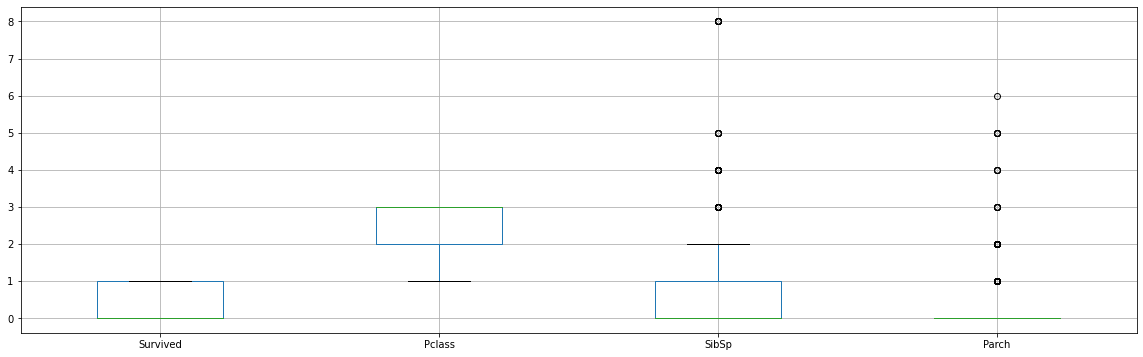

In [ ]:
#checking for outliers
df_t2= df_t1
plt.figure(figsize = (20, 6))
df_t2.boxplot()
plt.show()

We choose to retain the outliers when conducting the EDA process

In [ ]:
#converting some categoerical values in the columns to numerical form
from sklearn.preprocessing import LabelEncoder
#Converting sex,age
print(df_t1["Age"].unique())

print(df_t1["Embarked"].unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
['S' 'C' 'Q' nan]


**Dataset 2: Test Dataset**

In [10]:
#checking for any anomalies of the Train dataset
col = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked']
for i in col:

  u = df_1[i].unique()
  print('Unique values of ', i , 'is' , u)

Unique values of  PassengerId is [ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 108

In [5]:
#Dropping the columns not needed in the training dataset
# Drop columns that we will not use in our analysis
#
df_1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)
# Confirm changes
df_1.head(2)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [ ]:
#Viewing the new columns
df_1.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
# Finding the mode of numerical columns
df_1['Age'].mode()

0    21.0
1    24.0
dtype: float64

In [ ]:
# Finding the mean of numerical columns
df_1['Age'].mean()

30.272590361445783

We will use the mean to replace the missing values

In [12]:

df_2 = df_1



# A anomaly noticed is nan in age column
# We will replace it with 0 age column so as not to skew the data
df_2['Age'] = df_2['Age'].replace(['nan'],30.3)





#viweing the changes
print(df_2)

     Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0    7.0000        S
2         2    male  62.0      0      0    9.6875        Q
3         3    male  27.0      0      0    8.6625        S
4         3  female  22.0      1      1   12.2875        S
..      ...     ...   ...    ...    ...       ...      ...
413       3    male   NaN      0      0    8.0500        S
414       1  female  39.0      0      0  108.9000        C
415       3    male  38.5      0      0    7.2500        S
416       3    male   NaN      0      0    8.0500        S
417       3    male   NaN      1      1   22.3583        C

[418 rows x 7 columns]


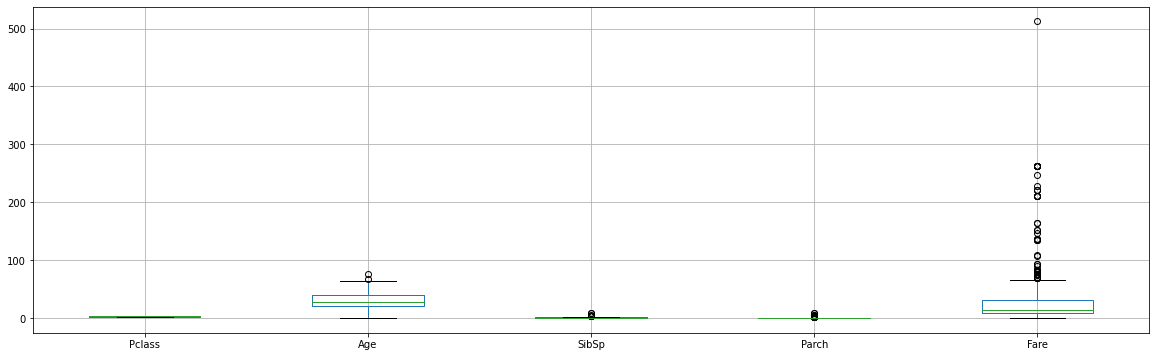

In [ ]:
#checking for outliers
df_3= df_2
plt.figure(figsize = (20, 6))
df_3.boxplot()
plt.show()

We will retain the outliers 

In [13]:
#converting some categoerical values in the columns to numerical form
from sklearn.preprocessing import LabelEncoder
#Converting sex,age
print(df_2["Age"].unique())

print(df_2["Embarked"].unique())

[34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54.   64.   37.   34.
 11.5   8.    0.33 38.   57.   40.5   0.92 19.   36.5   0.75  0.83 58.
  0.17 59.   14.5  44.    5.   51.    3.   38.5 ]
['Q' 'S' 'C']


# **3.EXPLORATORY DATA ANALYSIS** 

# **3.1 Univariate Analysis**

**Dataset 1**

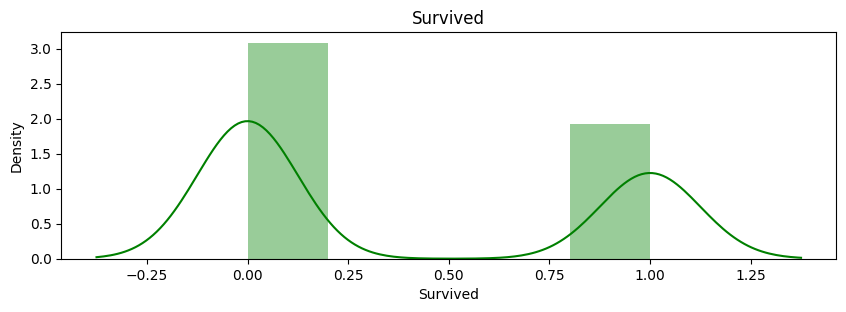

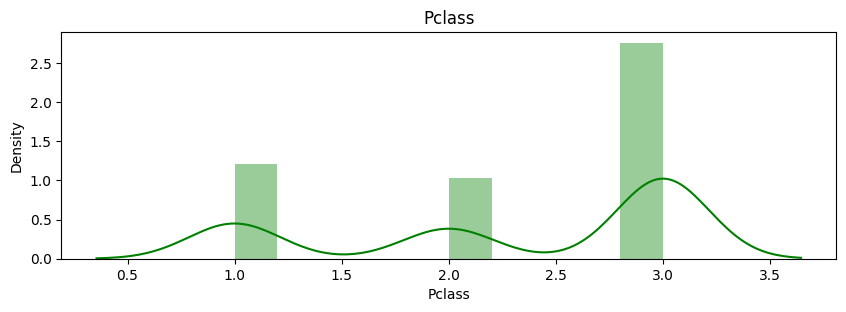

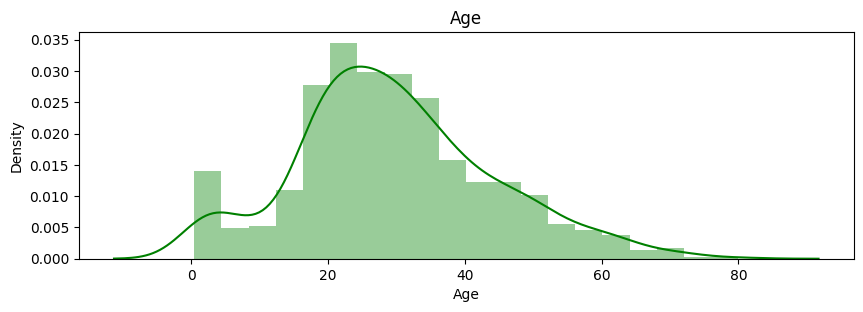

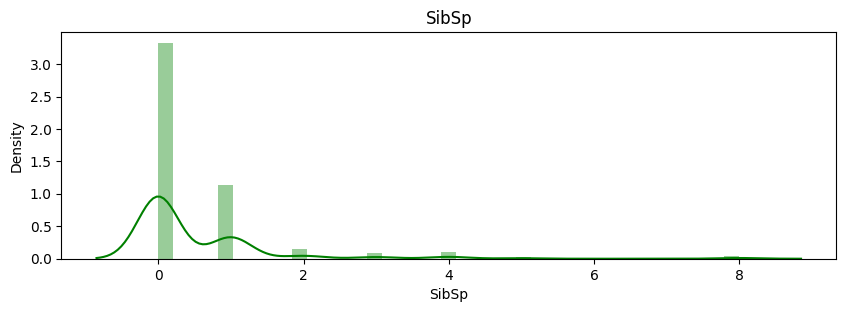

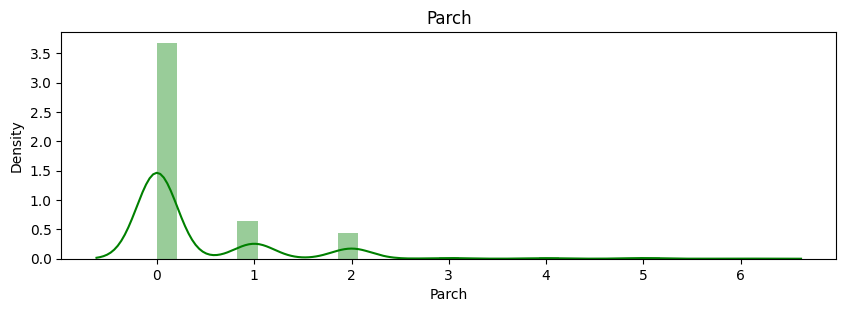

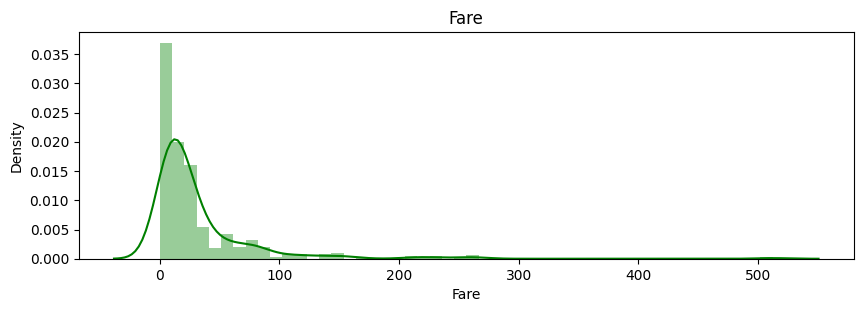

In [61]:
#Histogram of the numerical values
cols = ['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare']

for i in cols:
  plt.figure(figsize = (10,3), dpi=100)
  sns.distplot(df_t1[i], kde = True, color = 'green')
  plt.title(i, color = 'Black')
  plt.show()

From the above, the variables positively skewed are: Sibsp, Fare and parch

In [ ]:
#Viewing the training dataset
df_t1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

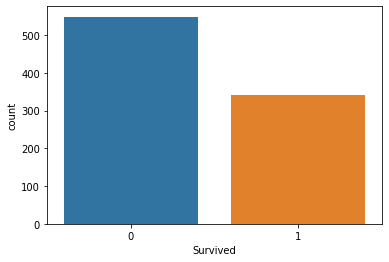

In [ ]:
# Plotting the count of the passengers that perished or survived in the status column

sns.countplot(df_t1['Survived'])

Most of the passeengers in the training dataset did  not survive.

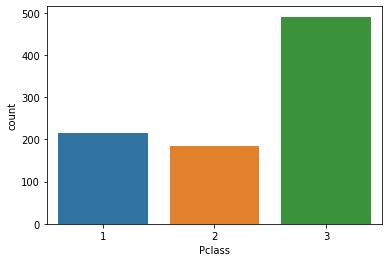

In [ ]:
# Plotting the count of the passenger class column

sns.countplot(df_t1['Pclass'])

The distribution of the passengers in the training dataset has the 3rd class as the most preferable for many passengers

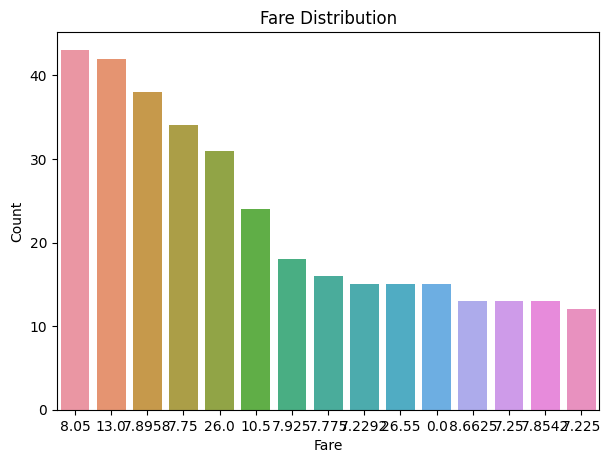

In [ ]:
#Countplot showing the age distribution
plt.figure(figsize = (7,5), dpi=100)
sns.countplot(df_t1['Fare'], order=df_t1['Fare'].value_counts().index[:15])
plt.title('Fare Distribution')
plt.ylabel("Count")
plt.show()

The distribution of fares across the Titanic has  8.05 pounds as most affordable

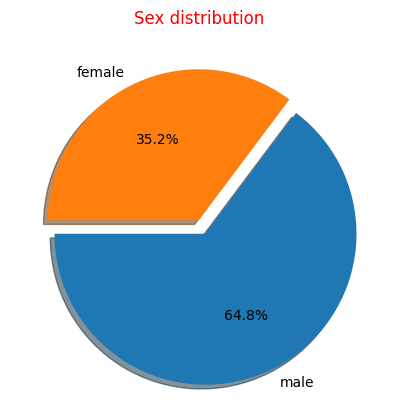

In [ ]:
# Pie chart showing the distribution of the passengers 
accounts = df_t1['Sex'].value_counts()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0.1,0), shadow=True, startangle=180)
plt.title('Sex distribution', color='Red')
plt.show()

Their were more male passengers

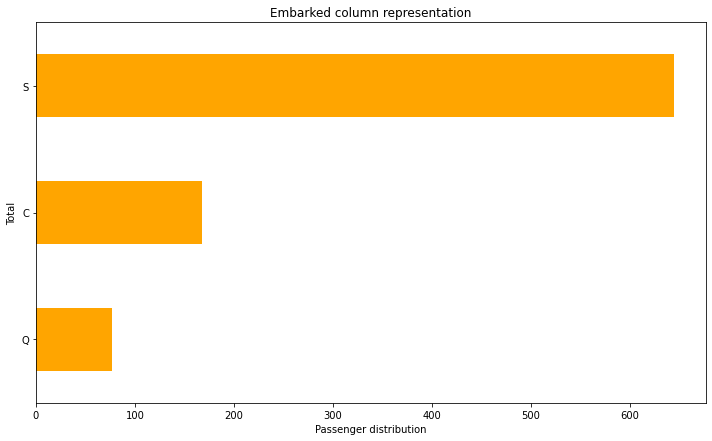

In [ ]:
# Bar chart showing the places where the Titanic ship picked passengers
plt.figure(figsize = (12,7))
df_t1.groupby('Embarked').size().sort_values(ascending = True).plot(kind='barh', color='orange')
plt.title('Embarked column representation')
plt.ylabel('Total')
plt.xlabel('Passenger distribution')
plt.show()

The Titanic ship picked more passengers and supplies in the Southampton Dock

Statistics summaries

In [ ]:
# Frequency Table of Age 
df_t1.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

Most of the passengers are 24 years old

In [ ]:
# The Kurtosis of numerical columns
df_t1['Survived'].kurt()

-1.775004671066304

The data is lightly tailed

**Dataset 2**:Test Dataset

Univariate Analyis

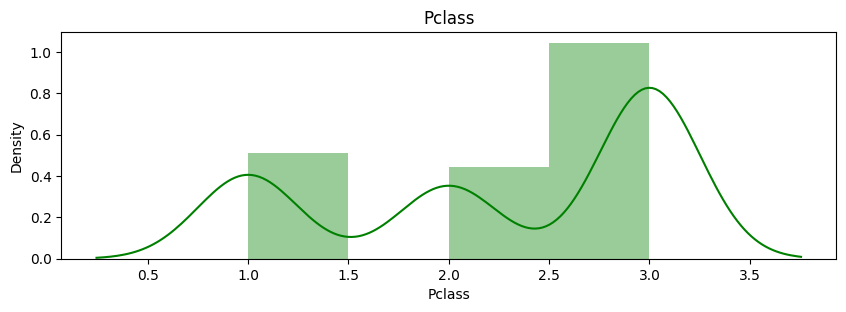

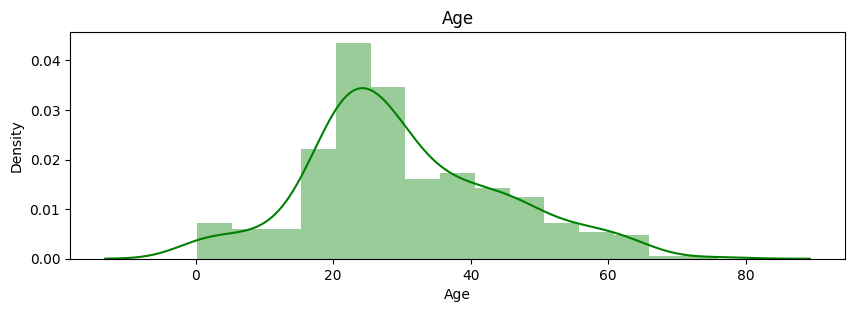

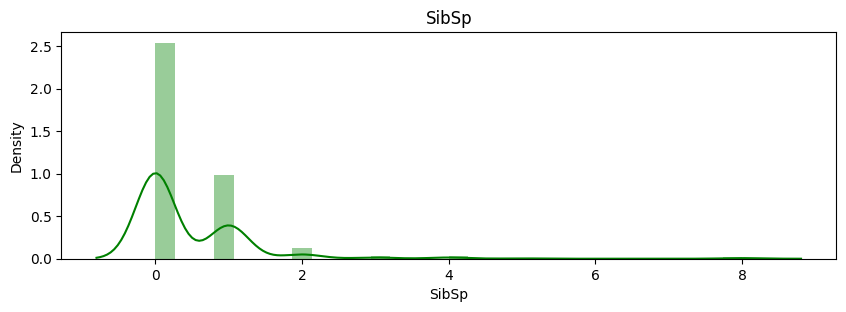

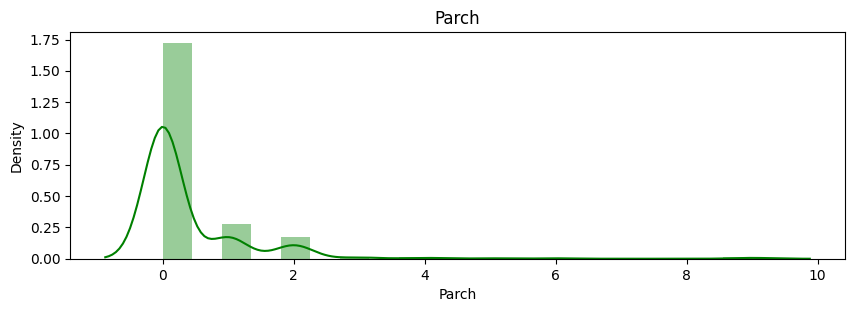

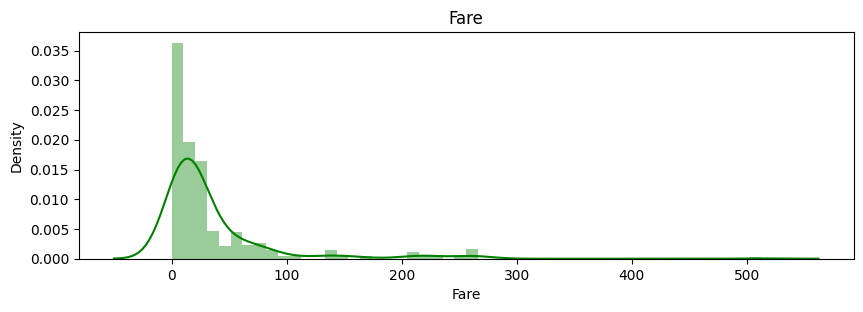

In [ ]:
#Histogram of the numerical values
cols = ['Pclass','Age', 'SibSp', 'Parch', 'Fare']

for i in cols:
  plt.figure(figsize = (10,3), dpi=100)
  sns.distplot(df_2[i], kde = True, color = 'green')
  plt.title(i, color = 'Black')
  plt.show()

The positively skewed data is:Fares, Sibsp and Parch. 

In [ ]:
#Viewing the columns we will be working with in the Test dataset
df_2.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

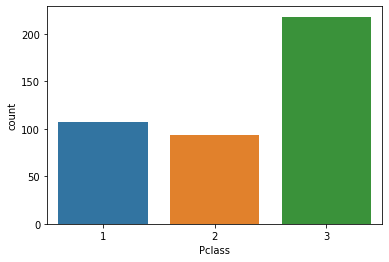

In [ ]:
# Plotting the count of the passenger class column

sns.countplot(df_2['Pclass'])

Most of the passengers in the test dataset are in 3rd class

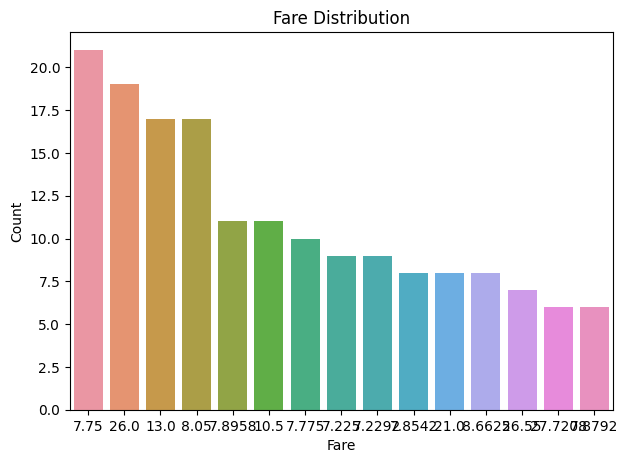

In [ ]:
#Countplot showing the Fare distribution
plt.figure(figsize = (7,5), dpi=100)
sns.countplot(df_2['Fare'], order=df_2['Fare'].value_counts().index[:15])
plt.title('Fare Distribution')
plt.ylabel("Count")
plt.show()

Most of the passengers paid 7.75 Sterling pounds as fare

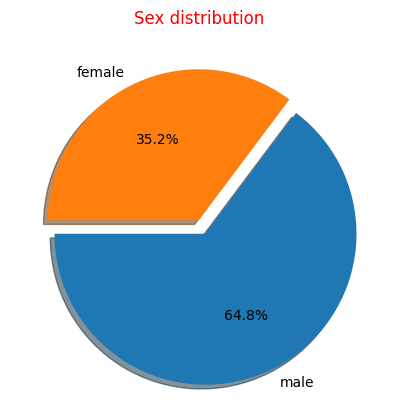

In [ ]:
# Pie chart showing the distribution of the passengers 
accounts = df_t1['Sex'].value_counts()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0.1,0), shadow=True, startangle=180)
plt.title('Sex distribution', color='Red')
plt.show()

The data has more male passengers 

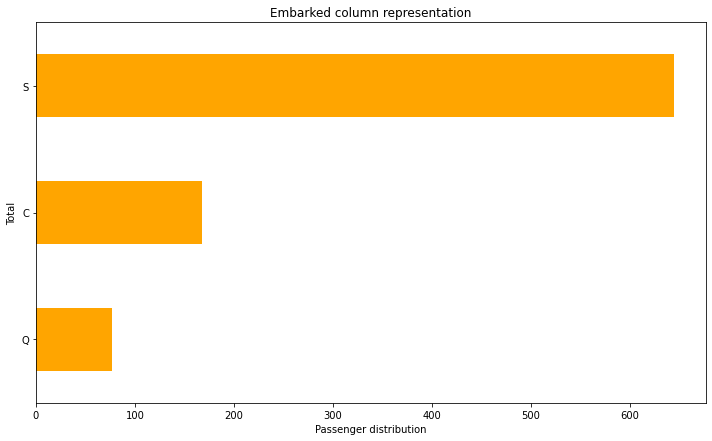

In [ ]:
# Bar chart showing the places where the Titanic ship picked passengers
plt.figure(figsize = (12,7))
df_t1.groupby('Embarked').size().sort_values(ascending = True).plot(kind='barh', color='orange')
plt.title('Embarked column representation')
plt.ylabel('Total')
plt.xlabel('Passenger distribution')
plt.show()

Titanic picked more passengers in the Southampton port

In [ ]:
# Frequency Table of Age 
df_t1.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

Most of the passengers were 24 years

In [ ]:
# The Kurtosis of numerical columns
df_t1['Survived'].kurt()

-1.775004671066304

The data has a negative kurtosis indicating ligter tails

**Recommendations**

1. The 3rd class had alot of passengers meaning that safety precautions should have been put in place
2. The age of passengers in the ship should have had the crew give priority to disabled and less fortunate.They should have been able to improvise.


# **3.2 Bivariate Analysis**

**Dataset 1:Training Dataset**

<Figure size 700x500 with 0 Axes>

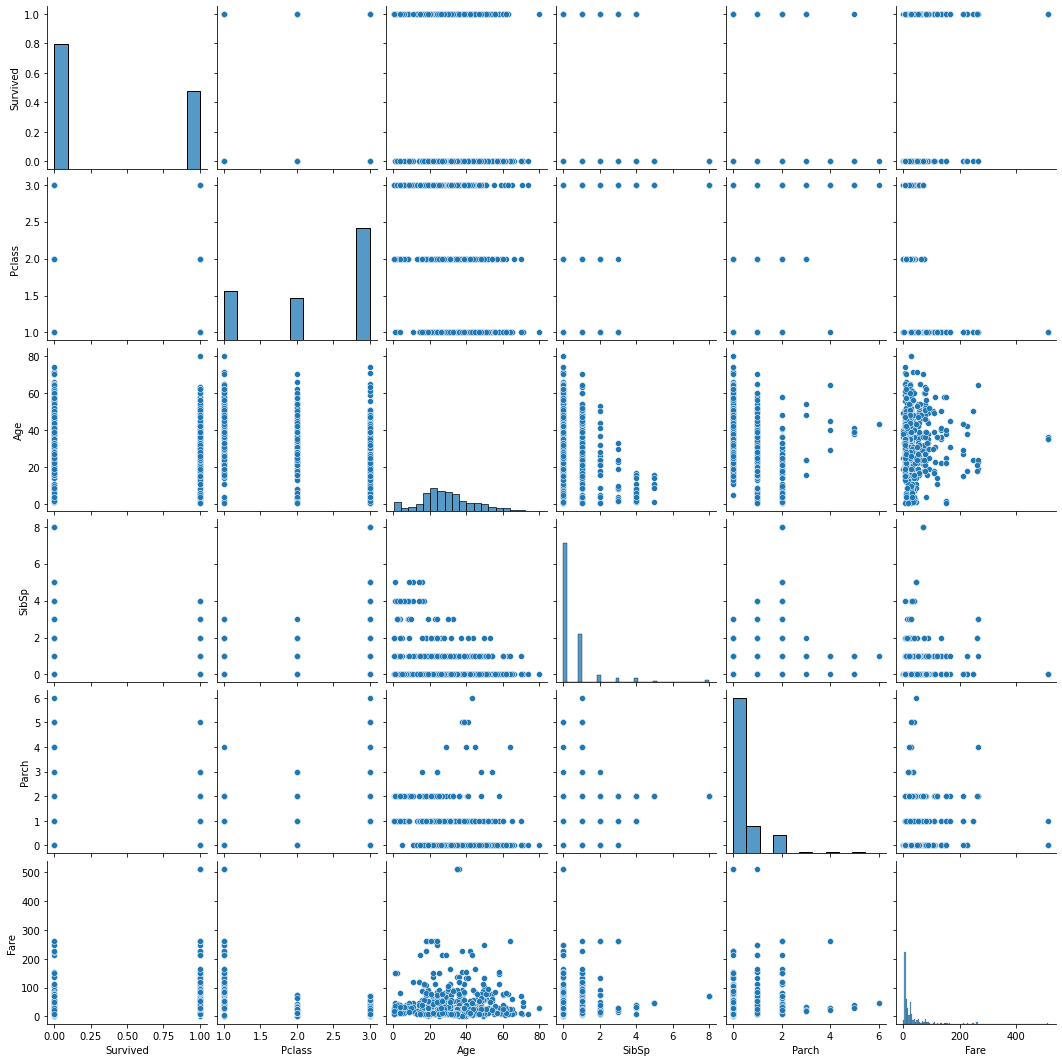

In [62]:
#Plotting a pairplot of all the numerical values
plt.figure(figsize = (7, 5), dpi=100)
y =['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(df_t1[y])

Their is no relationship between some columns

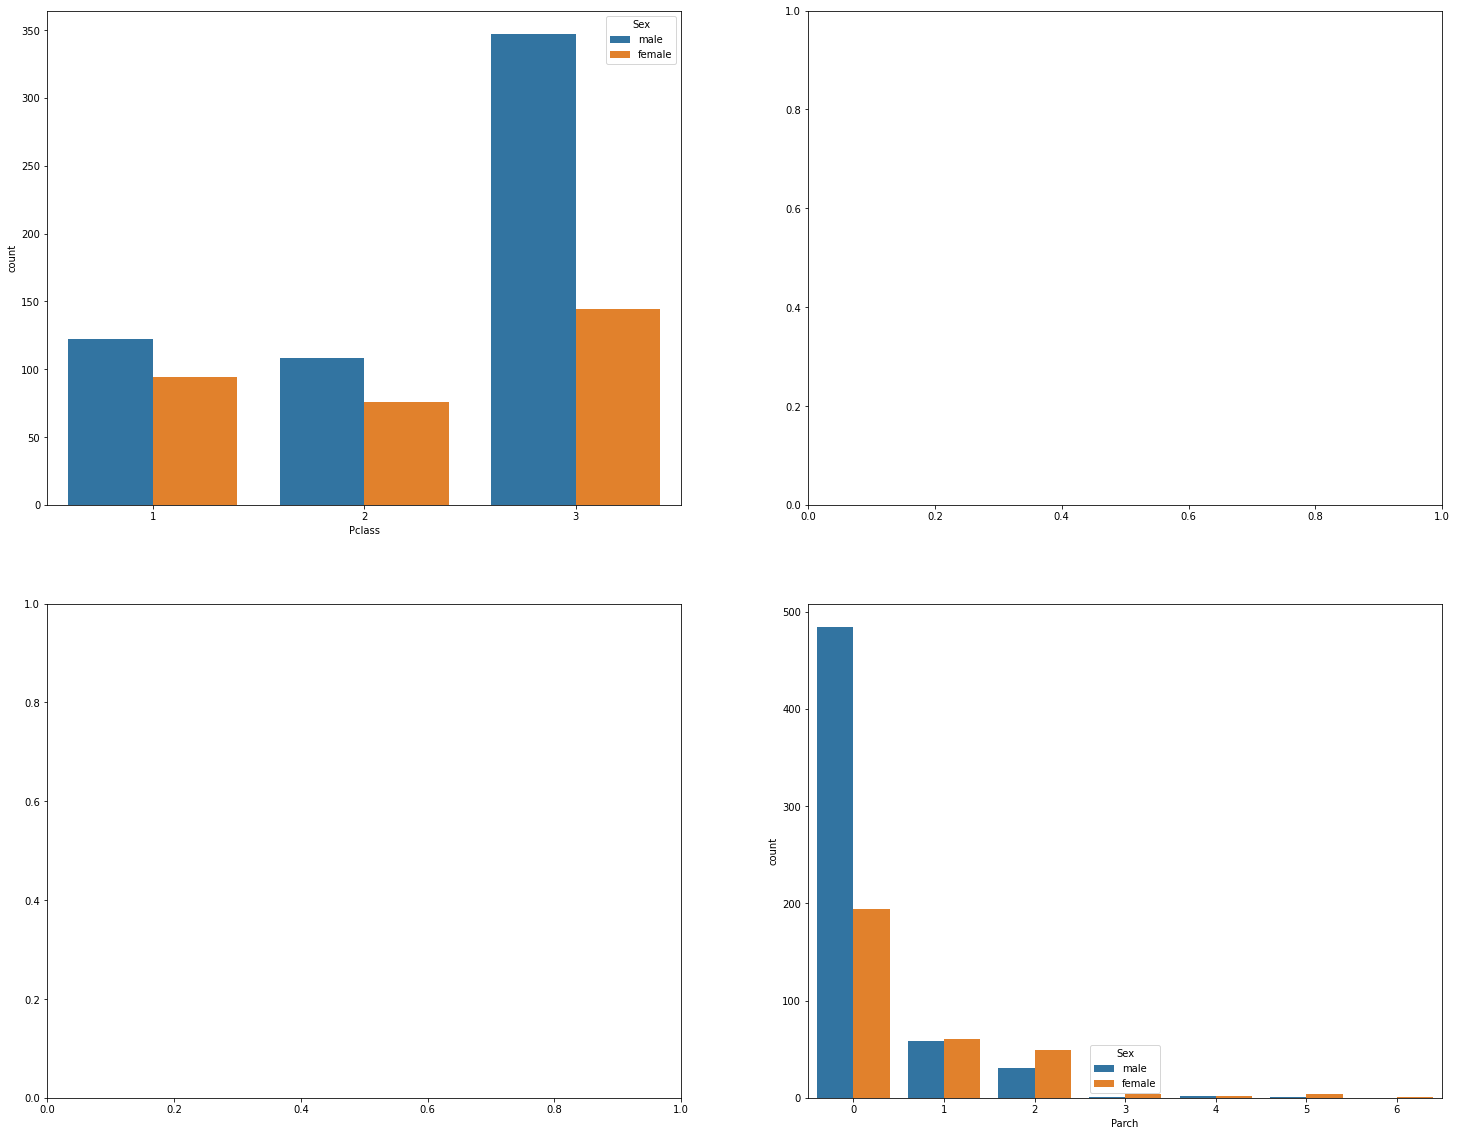

In [ ]:
#Plotting a relationship between sex of the passengers and, passenger class, age,Survived perch and fare
fig,axes = plt.subplots(2,2, figsize=(25,20))
sns.countplot(x='Pclass',hue='Sex',data=df_t1,ax=axes[0,0])

sns.countplot(x='Parch',hue='Sex',data= df_t1,ax=axes[1,1])


The distribution of the sexes in different passenger classes in the ship has more males in all classes especially in the third class.This might suggest that most of the staff were hosted in the third class

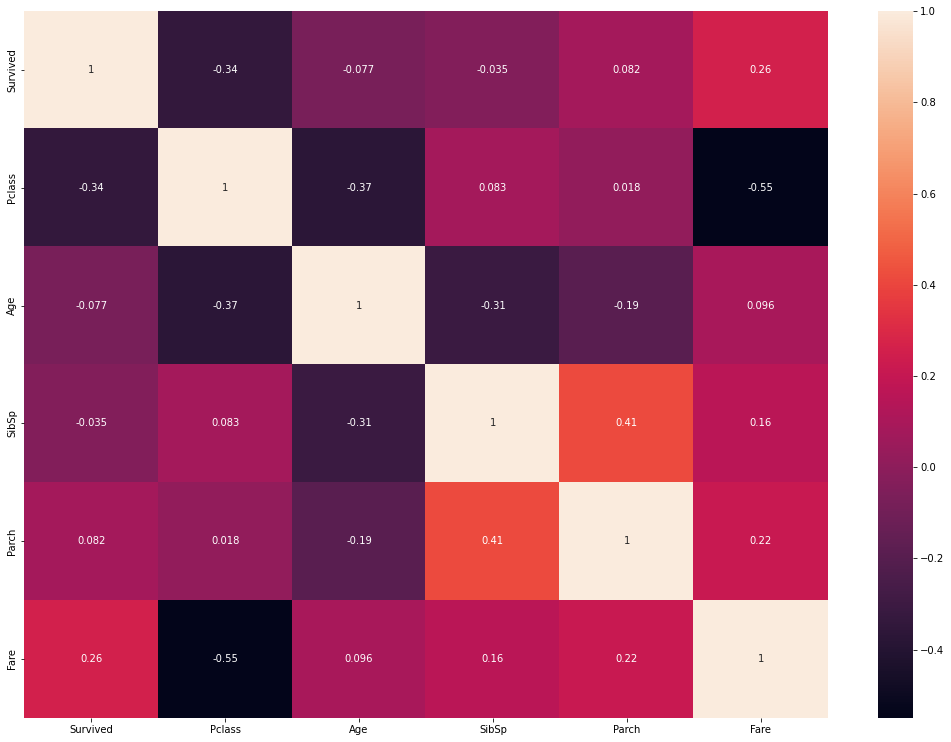

In [ ]:
#A correlation matrix of the numerical values
corr = df_t1.corr()
fig, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(corr, annot=True)

The is a positive correlation between variibles such as:fare and survival rates-this means that the survival rate of a passenger dependended on how much a passenger had paid, fare and parch, fare and Sibsp. The notable negative correlated variables are passenger class and fare, age and pclass, pclass and survived. 

Dataset 2:TEST Dataset

<Figure size 700x500 with 0 Axes>

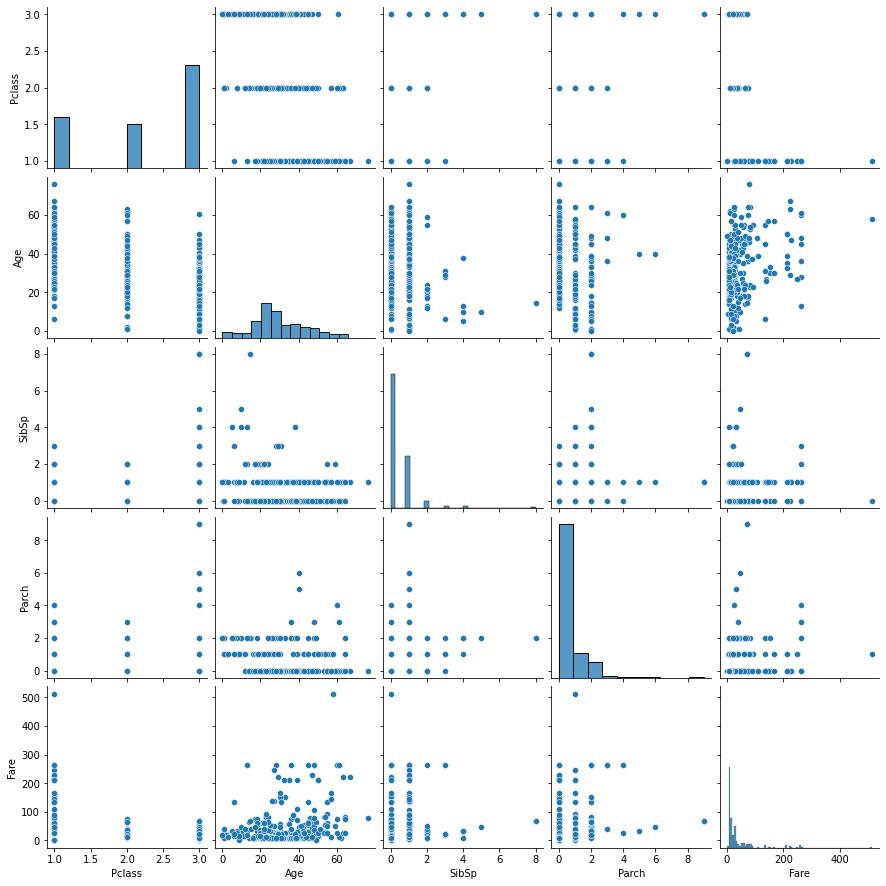

In [ ]:
#Plotting a pairplot of all the numerical values
plt.figure(figsize = (7, 5), dpi=100)
y =['Pclass','Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(df_2[y])

Their is no relationship between some columns

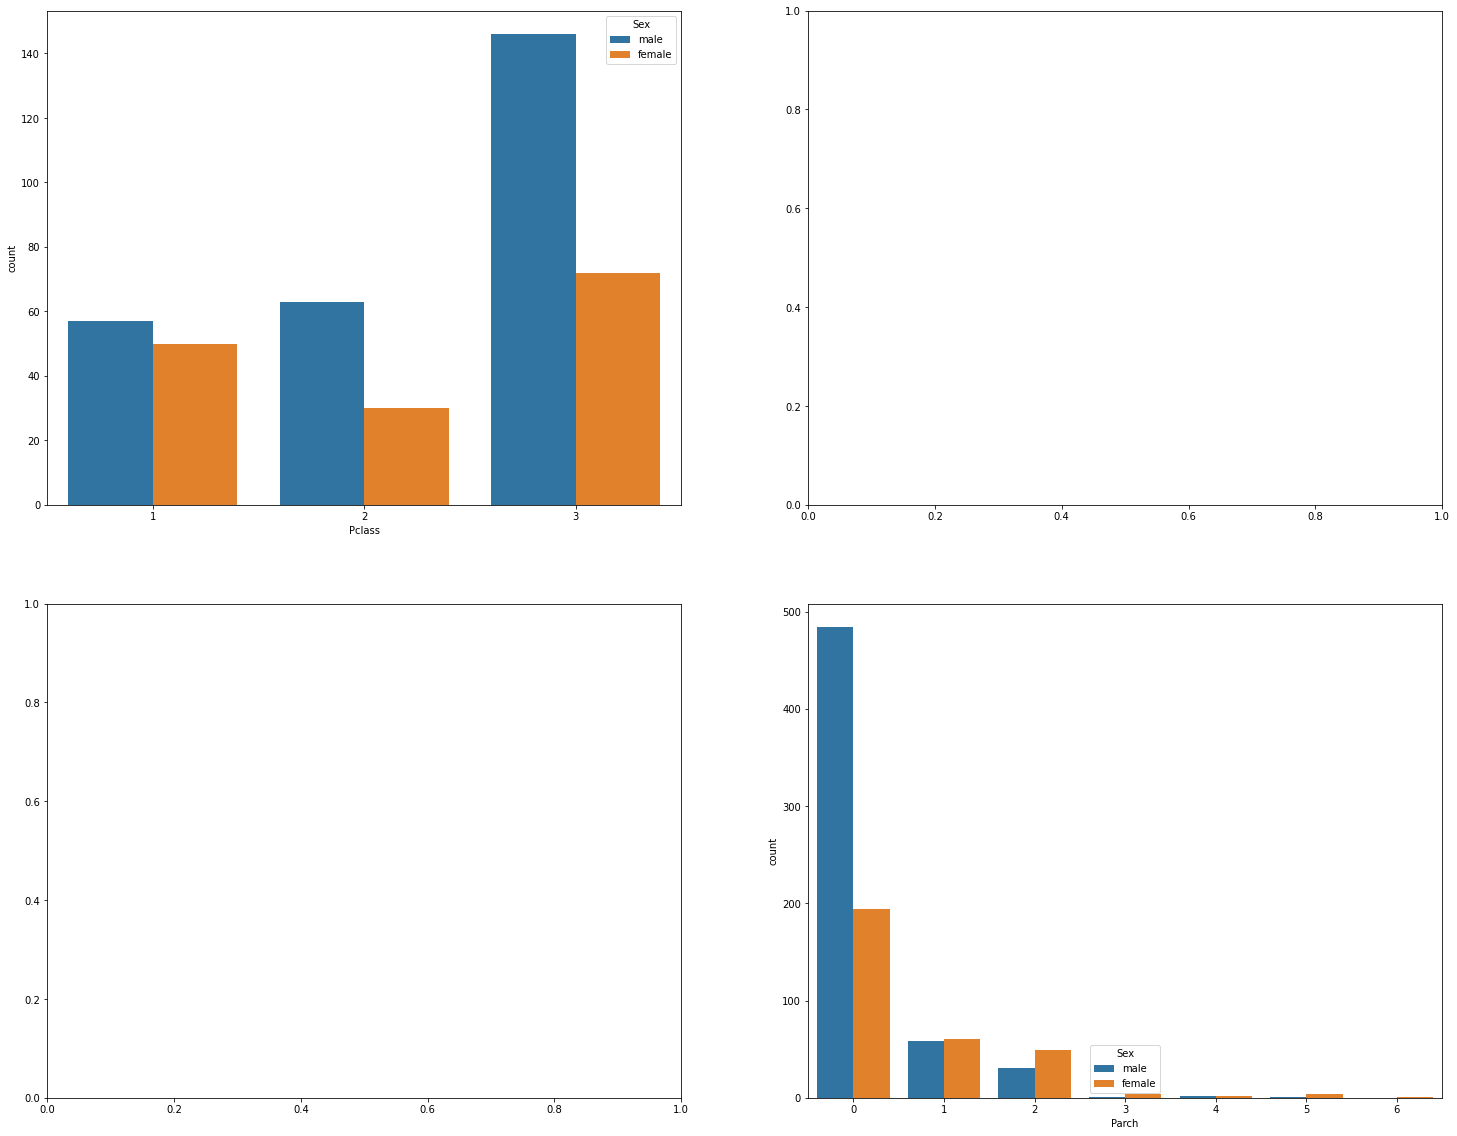

In [ ]:
#Plotting a relationship between sex of the passengers: passenger class, and perch.
fig,axes = plt.subplots(2,2, figsize=(25,20))
sns.countplot(x='Pclass',hue='Sex',data=df_2,ax=axes[0,0])

sns.countplot(x='Parch',hue='Sex',data= df_t1,ax=axes[1,1])

The visualization above shows that the males  were more than the females in the passenger classesand perch.

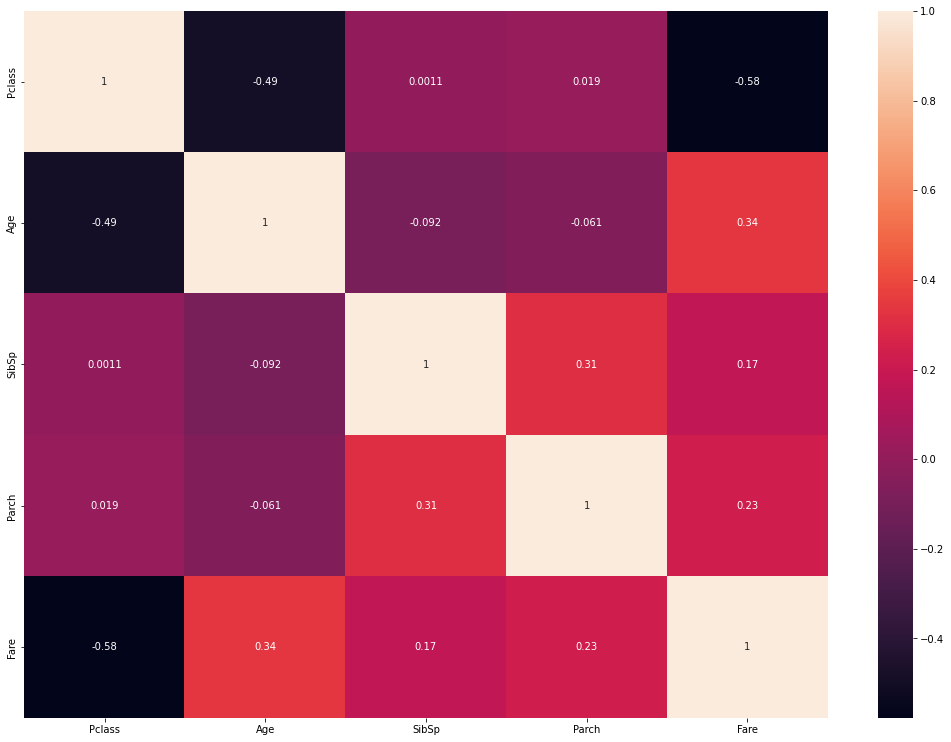

In [ ]:
#A correlation matrix of the numerical values
corr = df_2.corr()
fig, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(corr, annot=True)

The notable positive correlations are in the columns: Age and fare, Sibsp and Parch. The negative correlations are between fare and pclass, age and pclass.

**Recommendations**

1. The relationship between age and Passenger class suggest a big disparity in how the passengers were distributed across the ship. An equal distribution would have seen some elderly people get help
2. Their were more males in most passenger classes suggesting a huge gap on the ladies seeking help when disaster struck.

# **3.3 Multivariate Analysis**

The nature of the models to be built suggest a Supervised Learning Process. We therefore use the Linear Discriminant Analysis to assess the relationship between the techniques

**Dataset1: Training Dataset**

In [14]:
df_t1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
df_t1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [63]:
#These are the columns that we will use for the analysis
dfc = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']

In [64]:
#Encoding the multiple columns at ago
df_t3 = df_t1[dfc].apply(LabelEncoder().fit_transform)
df_t3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2
4,0,2,1,47,0,0,43,2


In [17]:
#Importing the libraries needed for multivariate analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [18]:
#These are the columns that we will use for the analysis
coll = ['status', 'age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'goitre', 'TSH', 'T3',
       'TT4', 'T4U']

In [20]:
df_t3.shape

(891, 8)

In [21]:
#Step 1: Seperating our target label (diagnosis) from other features
X = df_t3.drop(['Survived'], axis = 1)
Y = df_t3['Survived']

In [22]:
#Step 2: Confirming the features don't contain the target variable
X[0:9]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,28,1,0,18,2
1,0,0,51,1,0,207,0
2,2,0,34,0,0,41,2
3,0,0,47,1,0,189,2
4,2,1,47,0,0,43,2
5,2,1,88,0,0,51,1
6,0,1,69,0,0,186,2
7,2,1,6,3,1,124,2
8,2,0,35,0,2,74,2


In [23]:
#Step 3: Create an instance of LDA and train the model
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,Y)
lda_feat = X_lda.transform(X)

#Display the coefficients of the reducted colums
X_lda.coef_

array([[-0.7238668 , -3.49509086, -0.0142998 , -0.35087222, -0.20042445,
         0.0057657 , -0.31332106]])

In [24]:
#Since the coefficients are in array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
Fare,0.005766
Age,-0.014300
Parch,-0.200424
Embarked,-0.313321
SibSp,-0.350872
Pclass,-0.723867
Sex,-3.495091


The factor that influence a positive outcome on the dependent variable is the fare variable. The rest do not.

**Dataset 2:Test Data**

In [25]:
df_2.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [26]:
#These are the columns that we will use for the analysis
dfc = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [27]:
#Encoding the multiple columns at ago
df_2 = df_2[dfc].apply(LabelEncoder().fit_transform)
df_2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,44,0,0,24,1
1,2,0,60,1,0,5,2
2,1,1,74,0,0,41,1
3,2,1,34,0,0,34,2
4,2,0,27,1,1,46,2


In [28]:
#Importing the libraries needed for multivariate analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [29]:
#These are the columns that we will use for the analysis
coll = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [30]:
df_2.shape

(418, 7)

In [31]:
#Step 1: Seperating our target label (diagnosis) from other features
X = df_2.drop(['Pclass'], axis = 1)
Y = df_2['Pclass']

We settled for the Pclass column in the testing dataset due to its  relationship with what is being investigated

In [33]:
#Step 2: Confirming the features don't contain the target variable
X[0:8]

,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,44,0,0,24,1
1,0,60,1,0,5,2
2,1,74,0,0,41,1
3,1,34,0,0,34,2
4,0,27,1,1,46,2
5,1,17,0,0,37,2
6,0,38,0,0,14,1
7,1,32,1,1,100,2


In [34]:
#Step 3: Create an instance of LDA and train the model
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,Y)
lda_feat = X_lda.transform(X)

#Display the coefficients of the reducted colums
X_lda.coef_

array([[ 2.97161979,  0.12364204, -1.15864431, -1.52137972,  0.17616773,
         1.49385123],
       [ 3.23783624,  0.0924952 , -0.48178523, -0.67789698,  0.09825125,
         2.69509499],
       [ 2.96286122,  0.10670653,  0.27469896, -0.03923828,  0.04674413,
         2.42111585]])

In [35]:
#Since the coefficients are in array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
Sex,2.971620
Embarked,1.493851
Fare,0.176168
Age,0.123642
SibSp,-1.158644
Parch,-1.521380


The factors that influence the target varibles are:sex, embarked, fare and age. The rest do not

# 4.0 **MODEL BUILDING**

In [38]:
#Importing the libraries we need
import sklearn.linear_model as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Under this section, i will use Naives Bayes and KNN classifier to predict the chances of a passenger surviving in the Titanic ship. We will consider using the training dataset to predict the outcome.

#        **4.1** K-Nearest Neighbour Classifier

In [69]:
#Viewing the dataunder research
df_t3.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2


Our dependent variable is the survival column

**We start by splitting the data into 80-20 sets**

In [72]:
# Splitting our dataset into its attributes and labels
# ---

# ---
# 
# Splitting the data into test and train sets

#
#Step 1: Seperating our target label (diagnosis) from other features
X = df_t3.drop(['Survived'], axis = 1)
y = df_t3['Survived']
X_test = df_t3.copy()

In [73]:
# Train Test Split

# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [74]:
#Perfoming future scalling on the features under investigation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
#Training and Predictions
#k=5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [77]:
#Evaluating the KNN algorith
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[99 15]
 [24 41]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       114
           1       0.73      0.63      0.68        65

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.78      0.78      0.78       179



The second row of the confusion matrix predicts that 23 were wrongly  classified as not survived (true negative) and 41 were classified as survived. 

In [79]:
#Predicting accuracy score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy_score (y_test, y_pred)

0.7821229050279329

The 80-20 split model yielded a 78% accuracy. 

**Modelling the 70-30 set**

In [80]:
#Step 1: Seperating our target label (diagnosis) from other features
X = df_t3.drop(['Survived'], axis = 1)
y = df_t3['Survived']
X_test = df_t3.copy()

In [81]:
# Train Test Split

# ---Test size=0.3
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [82]:
#Perfoming future scalling on the features under investigation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
#Training and prediction
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [87]:
#Evaluating the KNN algorith
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[145  21]
 [ 27  75]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       166
           1       0.78      0.74      0.76       102

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



The second row of the predicted that 26 passengers were classified wrongly as survived(true negative) and 76 passengers were correctly classified as survived(true positives) 

In [86]:
#Predicting accuracy score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy_score (y_test, y_pred)

0.8208955223880597

The 70-30 model predicts 82% accuracy as compared to to the 80-20 model which yielded a 78% accuracy

**Modelling the 60-40 dataset**

In [88]:
#Step 1: Seperating our target label (diagnosis) from other features
X = df_t3.drop(['Survived'], axis = 1)
y = df_t3['Survived']
X_test = df_t3.copy()

In [89]:
# Train Test Split

# ---
# test size= 0.4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [90]:
#Perfoming future scalling on the features under investigation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
#Training and prediction
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [93]:
#Evaluating the KNN algorith
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[191  19]
 [ 44 103]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       210
           1       0.84      0.70      0.77       147

    accuracy                           0.82       357
   macro avg       0.83      0.81      0.81       357
weighted avg       0.83      0.82      0.82       357



The second row wrongly classified 43 passengers as survivors(true negatives) and 104 paasengers were correctly classified as survivors(true positives

In [95]:
#Predicting accuracy score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy_score (y_test, y_pred)

0.8235294117647058

The 60=40 test split predicted 82.35% accuracy ahead of 70-30(80%) and 60-40(78%). 

# 4.2 **Optimizing the solution** **bold text**

To optimize the solution and improve our 60-40 split which yielded the best results we use LDA, k-folds to search for the best parameters.

In [109]:
#Importing libraries needed
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [97]:
# Splitting the data into features and target variable

X = df_t3.drop('Survived', axis = 1)
y = df_t3.Survived

In [103]:
# Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [112]:
# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
          
kfold = KFold(n_splits = 5) 

# specifying number of folds for cross validation
from sklearn.model_selection import RandomizedSearchCV
        
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = -1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'uniform'}

After the optimization we then use the best parameters to assess the 60-40 KNN  split

In [113]:
#Step 1: Seperating our target label (diagnosis) from other features
X = df_t3.drop(['Survived'], axis = 1)
y = df_t3['Survived']
X_test = df_t3.copy()

In [114]:
# Train Test Split

# ---
# test size= 0.4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [115]:
#Perfoming future scalling on the features under investigation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [117]:
# Instantiating our model
# Using our best parameters using random search
knc = KNeighborsClassifier(metric = 'euclidean', n_neighbors= 9, weights = 'uniform')

# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


In [118]:

# Making prediction the created model
y_pred = model2.predict(X_test)



In [119]:
#Evaluating the KNN algorith
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[198  24]
 [ 47  88]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       222
           1       0.79      0.65      0.71       135

    accuracy                           0.80       357
   macro avg       0.80      0.77      0.78       357
weighted avg       0.80      0.80      0.80       357



The model has an 80% accuracy and a great number of wrongly predicted varibles have been reduced as a result of tuning.
The model also under the precision column predicts that 81% of the passengers recorded as survived actually survived. 

**Reccommendations**

I recommend that more optimization be done to help improve the performance of the above model

# 5.0 **Challengi8ng the Solution** 


We use the Random Forest Classifier to challenge the solution above

In [120]:
# Splitting the data into features and target variable

X = df_t3.drop('Survived', axis = 1)
y = df_t3.Survived

In [121]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables

y = df_t3['Survived'].values


test_features = df_t3.columns.to_list()
test_features.remove('Survived')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df_t3[test_features].values

# Train using 60% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

In [122]:
#Evaluating the KNN algorith
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[154  67]
 [ 91  45]]
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       221
           1       0.40      0.33      0.36       136

    accuracy                           0.56       357
   macro avg       0.52      0.51      0.51       357
weighted avg       0.54      0.56      0.55       357



In [123]:
#Predicting accuracy score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy_score (y_test, y_pred)

0.5574229691876751

The model has predicted 55% accuracy meaning that the above solution stands

# **5. Follow up Questions**

# **5,a.Did we have the right data?**

yes

# **5 b)Do we need an extra set of data**

The researchers should consider conducting an extensive research on other variables  that may influence the variable being investigated

# **5 c)Did we achieve our objective?**

The accuracy of the most preferred model yieled an 82% model accuracy